### Librerias 

In [1]:
import pandas as pd
import numpy as np

### Creacion del conjunto de datos

In [2]:
num_registros = 1000000
datos_continuos = np.random.rand(num_registros, 5)
discretos = ['row_A', 'row_B', 'row_C', 'row_D', 'row_E' ]
datos_discretos = np.random.choice(discretos, size=(num_registros, 5))
df = pd.DataFrame(datos_continuos, columns=[f'Continua_{i+1}' for i in range(5)])
for i in range(5):
    df[f'Discreta_{i+1}'] = datos_discretos[:,i]

In [3]:
df

,Continua_1,Continua_2,Continua_3,Continua_4,Continua_5,Discreta_1,Discreta_2,Discreta_3,Discreta_4,Discreta_5
0,0.758813,0.633552,0.300091,0.046659,0.035264,row_E,row_E,row_B,row_D,row_A
1,0.703421,0.127001,0.520142,0.543963,0.331237,row_A,row_E,row_A,row_D,row_A
2,0.305072,0.638404,0.475345,0.144938,0.011170,row_A,row_C,row_E,row_B,row_D
3,0.077397,0.381628,0.029504,0.850793,0.949889,row_D,row_E,row_A,row_A,row_A
4,0.417613,0.238561,0.638006,0.082036,0.224838,row_C,row_C,row_A,row_B,row_A
...,...,...,...,...,...,...,...,...,...,...
999995,0.057698,0.197248,0.622611,0.815558,0.717514,row_E,row_D,row_E,row_E,row_B
999996,0.998136,0.255857,0.369586,0.271193,0.269841,row_E,row_D,row_D,row_B,row_A
999997,0.731330,0.302756,0.610057,0.197532,0.330503,row_D,row_A,row_B,row_D,row_B
999998,0.669661,0.401747,0.534820,0.867339,0.415398,row_E,row_E,row_E,row_E,row_E


### Introducimos valores nulos de forma aleatoria para DF 

In [4]:
porcentaje_nulos = 0.2

In [5]:
total_nulos_continuos = int(np.floor(porcentaje_nulos * num_registros * 5))
total_nulos_discretos = int(np.floor(porcentaje_nulos * num_registros * 5))

In [6]:
# Continuos
indice_filas_cont = np.random.randint(0, df.shape[0], total_nulos_continuos)
indice_columnas_cont = np.random.randint(0, int(df.shape[1]/2), total_nulos_continuos)

In [7]:
# Discretos
indice_filas_dist = np.random.randint(0, df.shape[0], total_nulos_discretos)
indice_columnas_dist = np.random.randint(int(df.shape[1]/2), df.shape[1], total_nulos_discretos)

In [8]:
# Introducimos valores NaN para columnas Continuas
for i in range(total_nulos_continuos):
    df.iat[indice_filas_cont[i], indice_columnas_cont[i]] = np.nan    

In [9]:
# Introducimos valores NaN para columnas Discretas
for i in range(total_nulos_discretos):
    df.iat[indice_filas_dist[i], indice_columnas_dist[i]] = np.nan    

In [10]:
df.isnull().sum().sort_values(ascending = False) / df.shape[0] 

Continua_3    0.181797
Discreta_1    0.181756
Continua_5    0.181738
Continua_1    0.181202
Discreta_2    0.181140
Discreta_3    0.181139
Discreta_4    0.180948
Continua_2    0.180936
Continua_4    0.180900
Discreta_5    0.180758
dtype: float64

In [11]:
df.isnull().sum()

Continua_1    181202
Continua_2    180936
Continua_3    181797
Continua_4    180900
Continua_5    181738
Discreta_1    181756
Discreta_2    181140
Discreta_3    181139
Discreta_4    180948
Discreta_5    180758
dtype: int64

In [12]:
df

,Continua_1,Continua_2,Continua_3,Continua_4,Continua_5,Discreta_1,Discreta_2,Discreta_3,Discreta_4,Discreta_5
0,NaN,0.633552,0.300091,NaN,0.035264,row_E,row_E,row_B,row_D,NaN
1,0.703421,0.127001,0.520142,0.543963,0.331237,NaN,NaN,row_A,NaN,NaN
2,0.305072,0.638404,0.475345,0.144938,0.011170,row_A,row_C,row_E,row_B,NaN
3,0.077397,0.381628,0.029504,0.850793,0.949889,row_D,row_E,row_A,row_A,row_A
4,0.417613,0.238561,0.638006,NaN,0.224838,row_C,row_C,row_A,row_B,row_A
...,...,...,...,...,...,...,...,...,...,...
999995,0.057698,NaN,0.622611,0.815558,0.717514,row_E,row_D,NaN,row_E,row_B
999996,0.998136,0.255857,0.369586,0.271193,0.269841,NaN,NaN,row_D,row_B,row_A
999997,0.731330,0.302756,NaN,NaN,0.330503,row_D,row_A,row_B,row_D,NaN
999998,0.669661,0.401747,0.534820,0.867339,NaN,row_E,row_E,row_E,row_E,row_E


### Imputacion de valores nulos con diferentes tecnicas 

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputador_media = SimpleImputer(strategy='mean')

In [15]:
df[list(df.columns[0:5])] = imputador_media.fit_transform(df[list(df.columns[0:5])])

In [16]:
df.isnull().sum()

Continua_1         0
Continua_2         0
Continua_3         0
Continua_4         0
Continua_5         0
Discreta_1    181756
Discreta_2    181140
Discreta_3    181139
Discreta_4    180948
Discreta_5    180758
dtype: int64

In [17]:
imputador_moda = SimpleImputer(strategy='most_frequent')

In [18]:
df[list(df.columns[5:])] = imputador_moda.fit_transform(df[list(df.columns[5:])])

In [19]:
df.isnull().sum()

Continua_1    0
Continua_2    0
Continua_3    0
Continua_4    0
Continua_5    0
Discreta_1    0
Discreta_2    0
Discreta_3    0
Discreta_4    0
Discreta_5    0
dtype: int64

## Valores Extremos 

### Univariado

In [20]:
varc = df.columns[0:5]

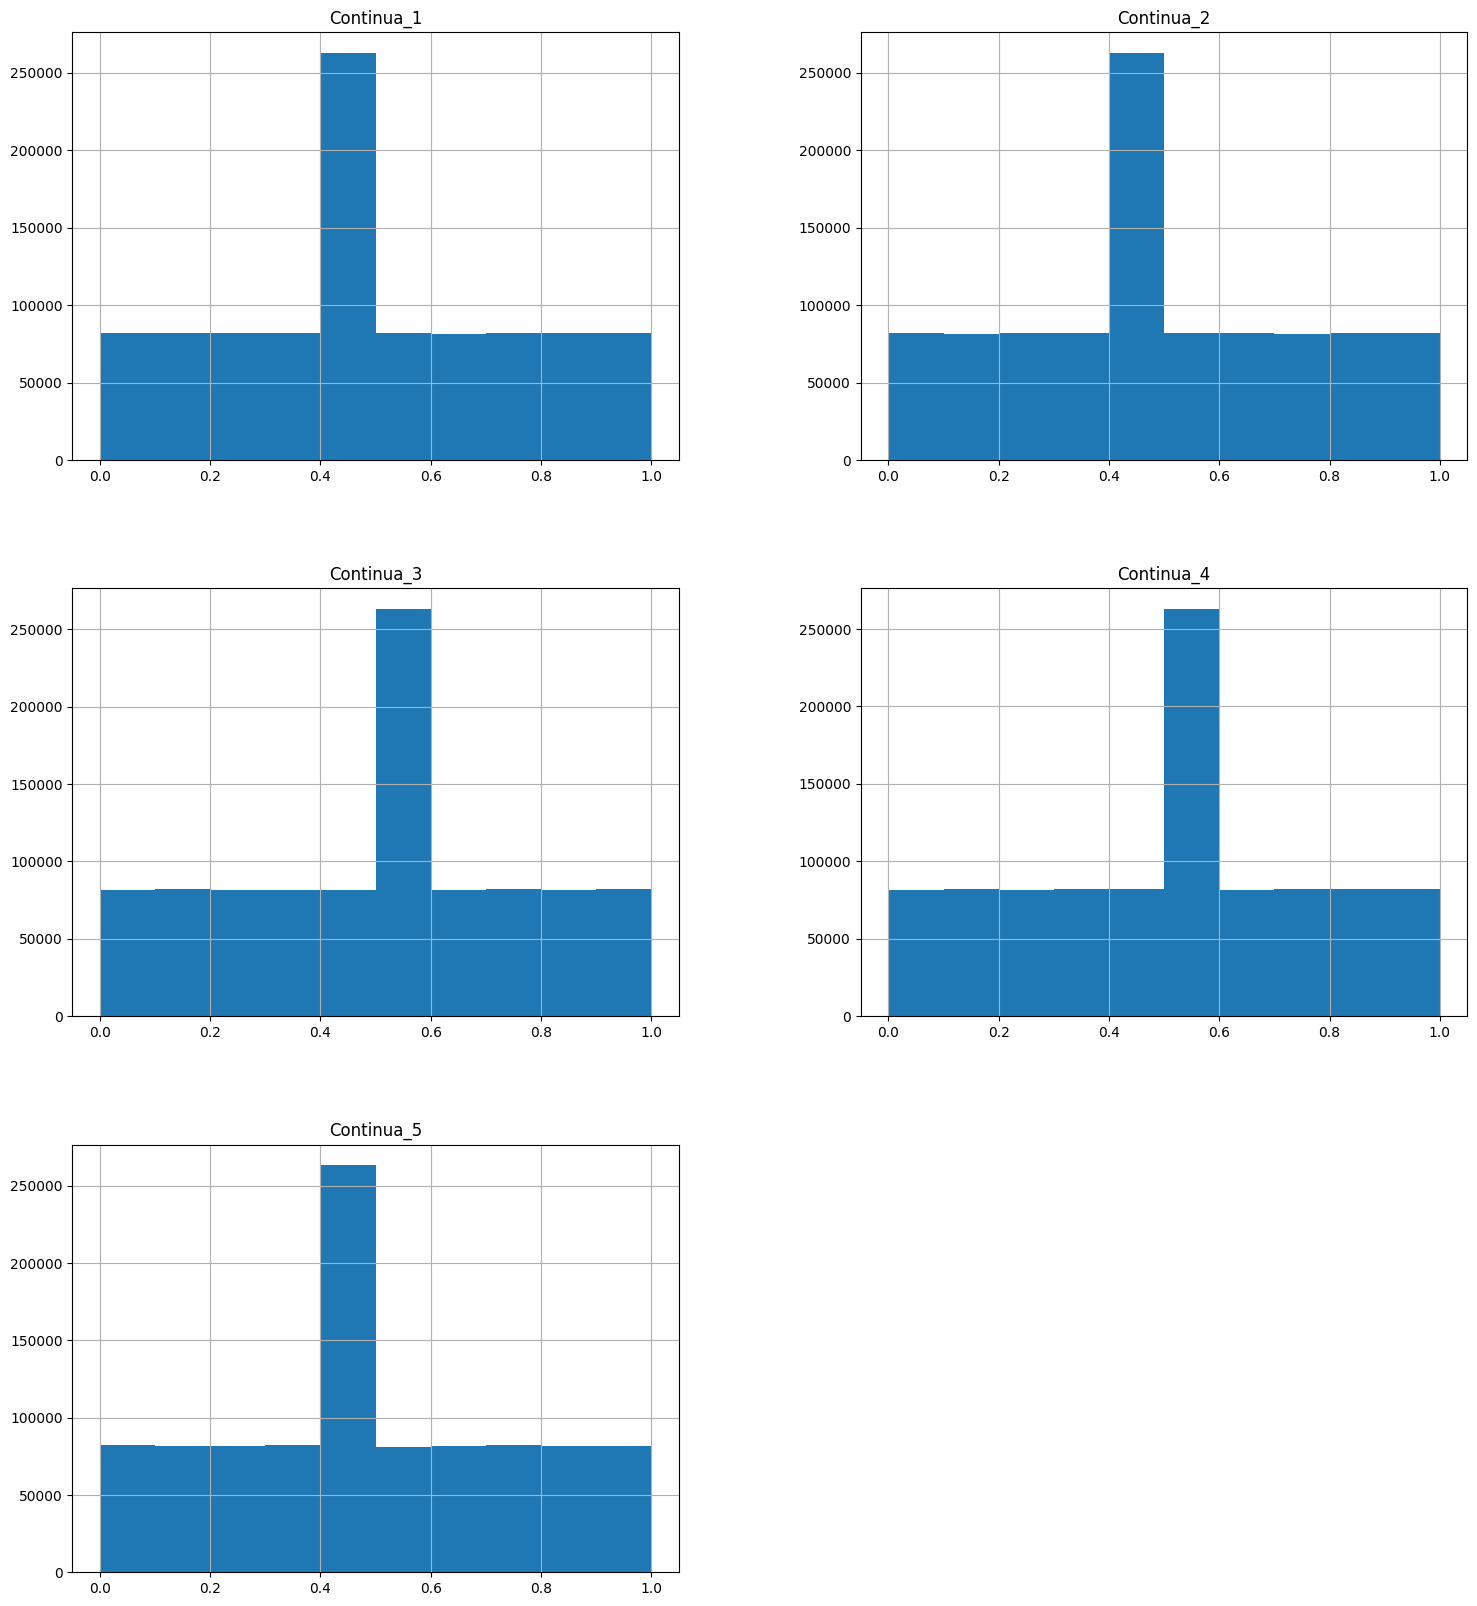

In [21]:
df[varc].hist(figsize=(18,20));

In [22]:
np.random.seed(0)

data = np.random.normal(loc=0, scale=1, size=(num_registros, int(df.shape[1]/2)))

for i in range(data.shape[1]):
    # Agregando valores extremos positivos
    data[np.random.choice(range(num_registros), size=10, replace=False), i] += np.random.uniform(10,20, size=10)
    # Agregando valores extremos negativo
    data[np.random.choice(range(num_registros), size=10, replace=False), i] -= np.random.uniform(10,20, size=10)
    
df2 = pd.DataFrame(data, columns=[f'Continua_{i+1}' for i in range(5)])

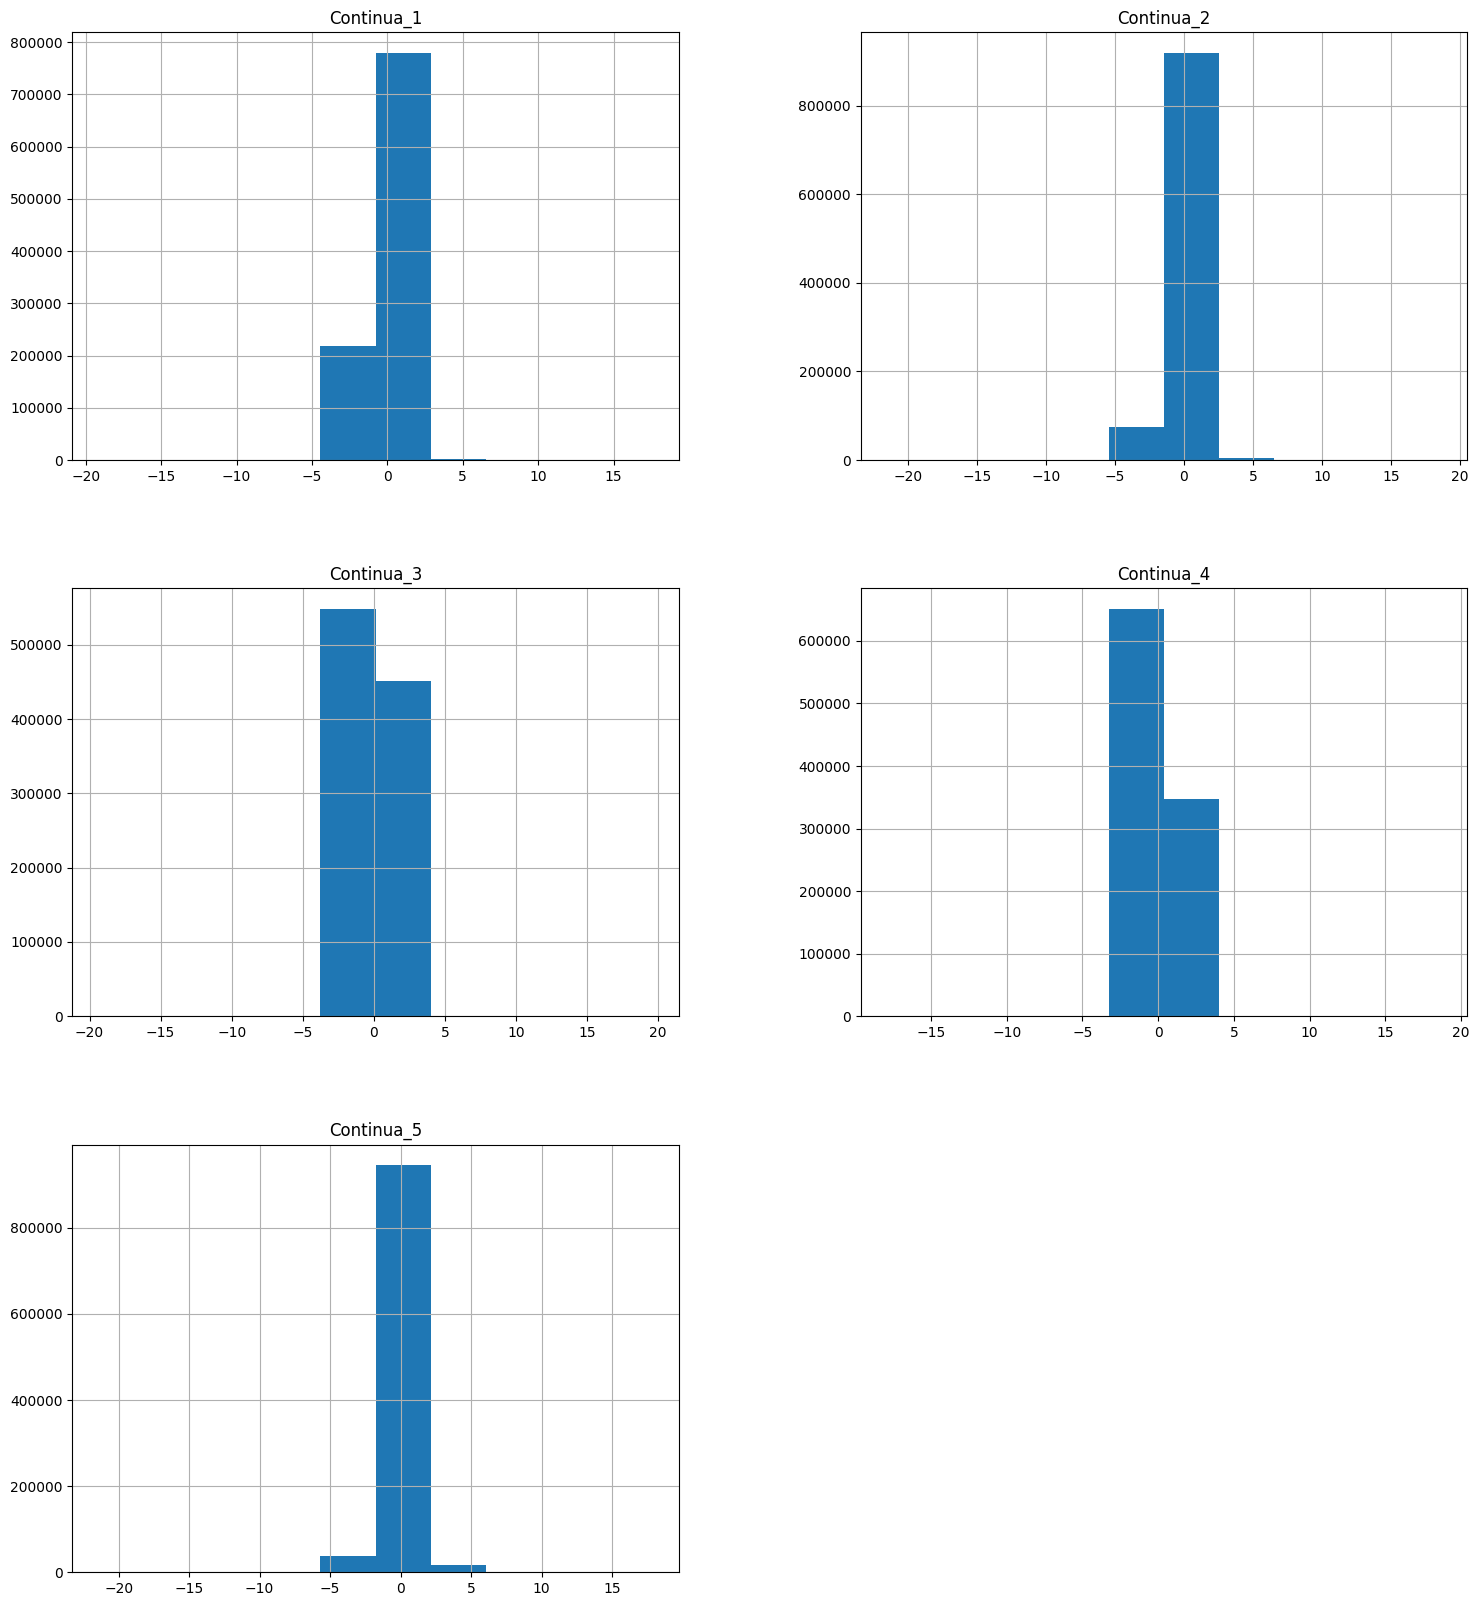

In [23]:
df2.hist(figsize=(18,20));

#### IQR

In [24]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

IQR = Q3 - Q1 

In [27]:
mask_iqr = ~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)

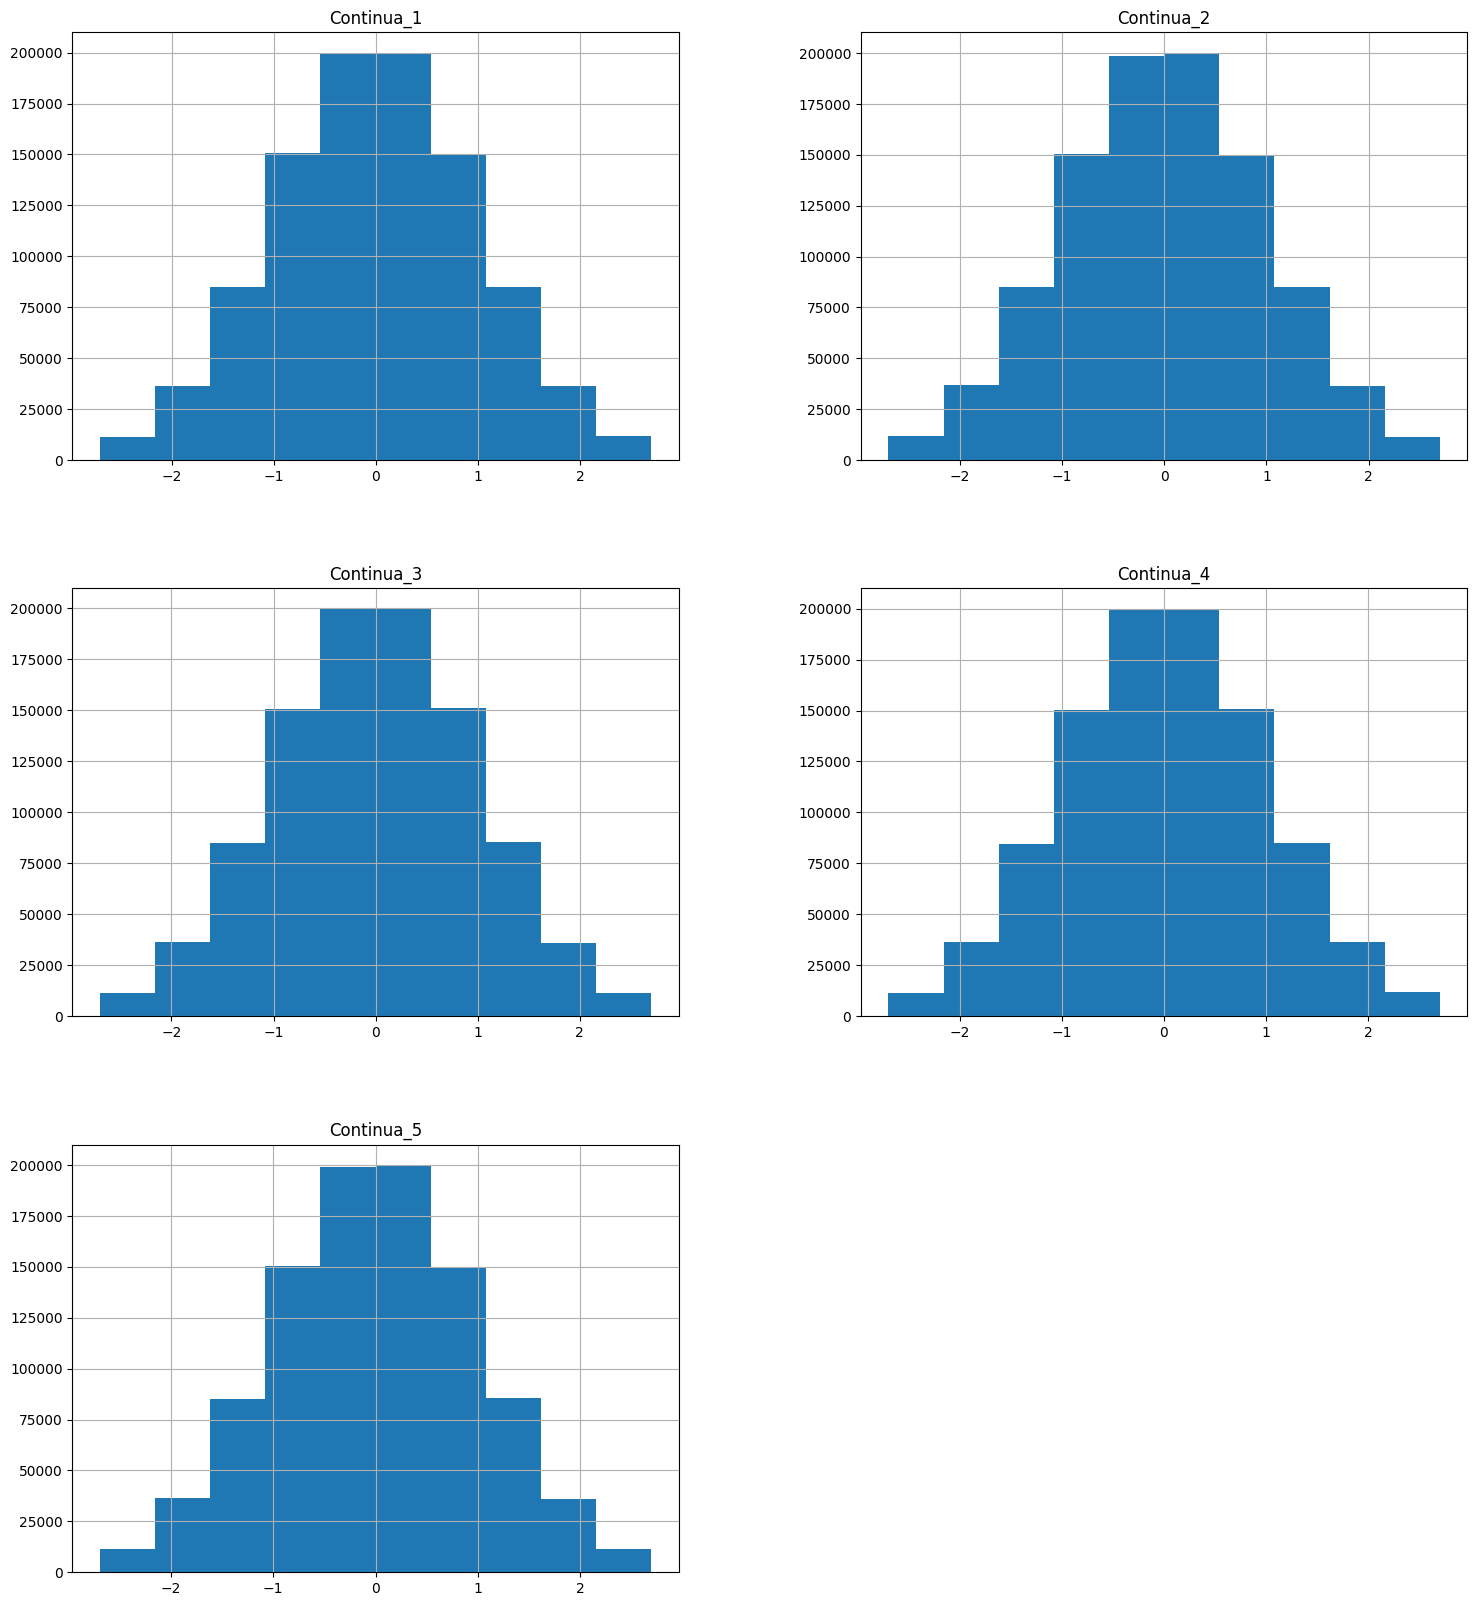

In [28]:
df2[mask_iqr].hist(figsize=(18,20));

In [29]:
len(df2), len(df2[mask_iqr])

(1000000, 965573)

In [30]:
len(df2) - len(df2[mask_iqr])

34427

In [39]:
(965573*100)/1000000

96.5573

#### Z-score

In [40]:
from scipy.stats import zscore

In [42]:
Z_scores = df2.apply(zscore)

In [44]:
mask_zscore = (Z_scores > -3) & (Z_scores < +3)

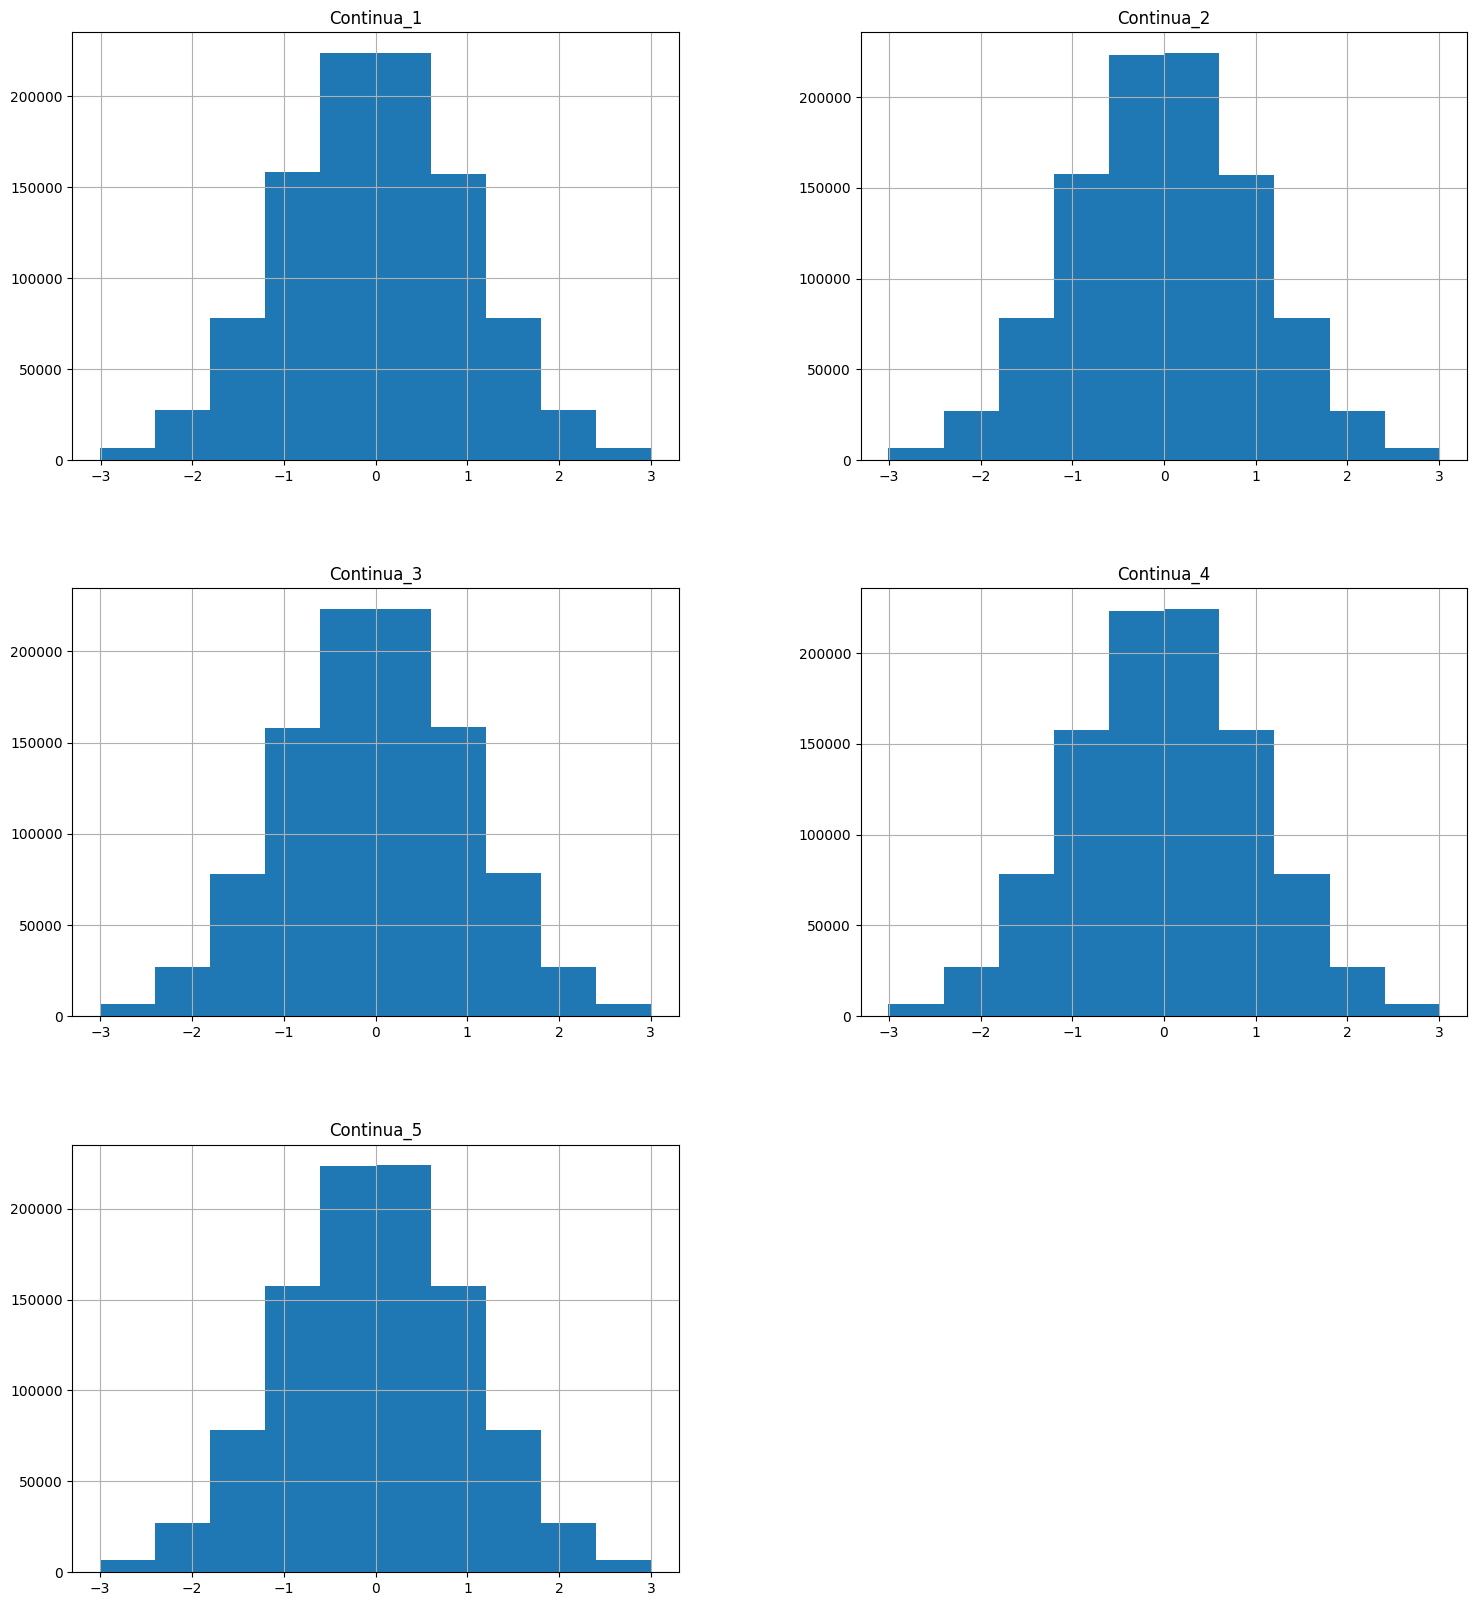

In [49]:
df2[mask_zscore.all(axis=1)].hist(figsize=(18,20));

In [50]:
len(df2), len(df2[mask_zscore.all(axis=1)])

(1000000, 986748)

In [51]:
len(df2) - len(df2[mask_zscore.all(axis=1)])

13252

In [52]:
(986748*100)/1000000

98.6748

### Multivatiado

#### IsolationForest

In [53]:
from sklearn.ensemble import IsolationForest

In [54]:
iso_forest = IsolationForest(n_estimators=100, random_state=42)

In [55]:
iso_forest.fit(df2)

IsolationForest(random_state=42)

In [57]:
iso_preds = iso_forest.predict(df2)

In [58]:
iso_preds

array([-1,  1,  1, ...,  1,  1,  1])

In [59]:
pd.Series(iso_preds).unique()

array([-1,  1])

In [62]:
len(df2), len(df2[iso_preds==1])

(1000000, 869185)

In [61]:
len(df2), len(df2[iso_preds==-1])

(1000000, 130815)

In [63]:
(869185*100)/1000000

86.9185

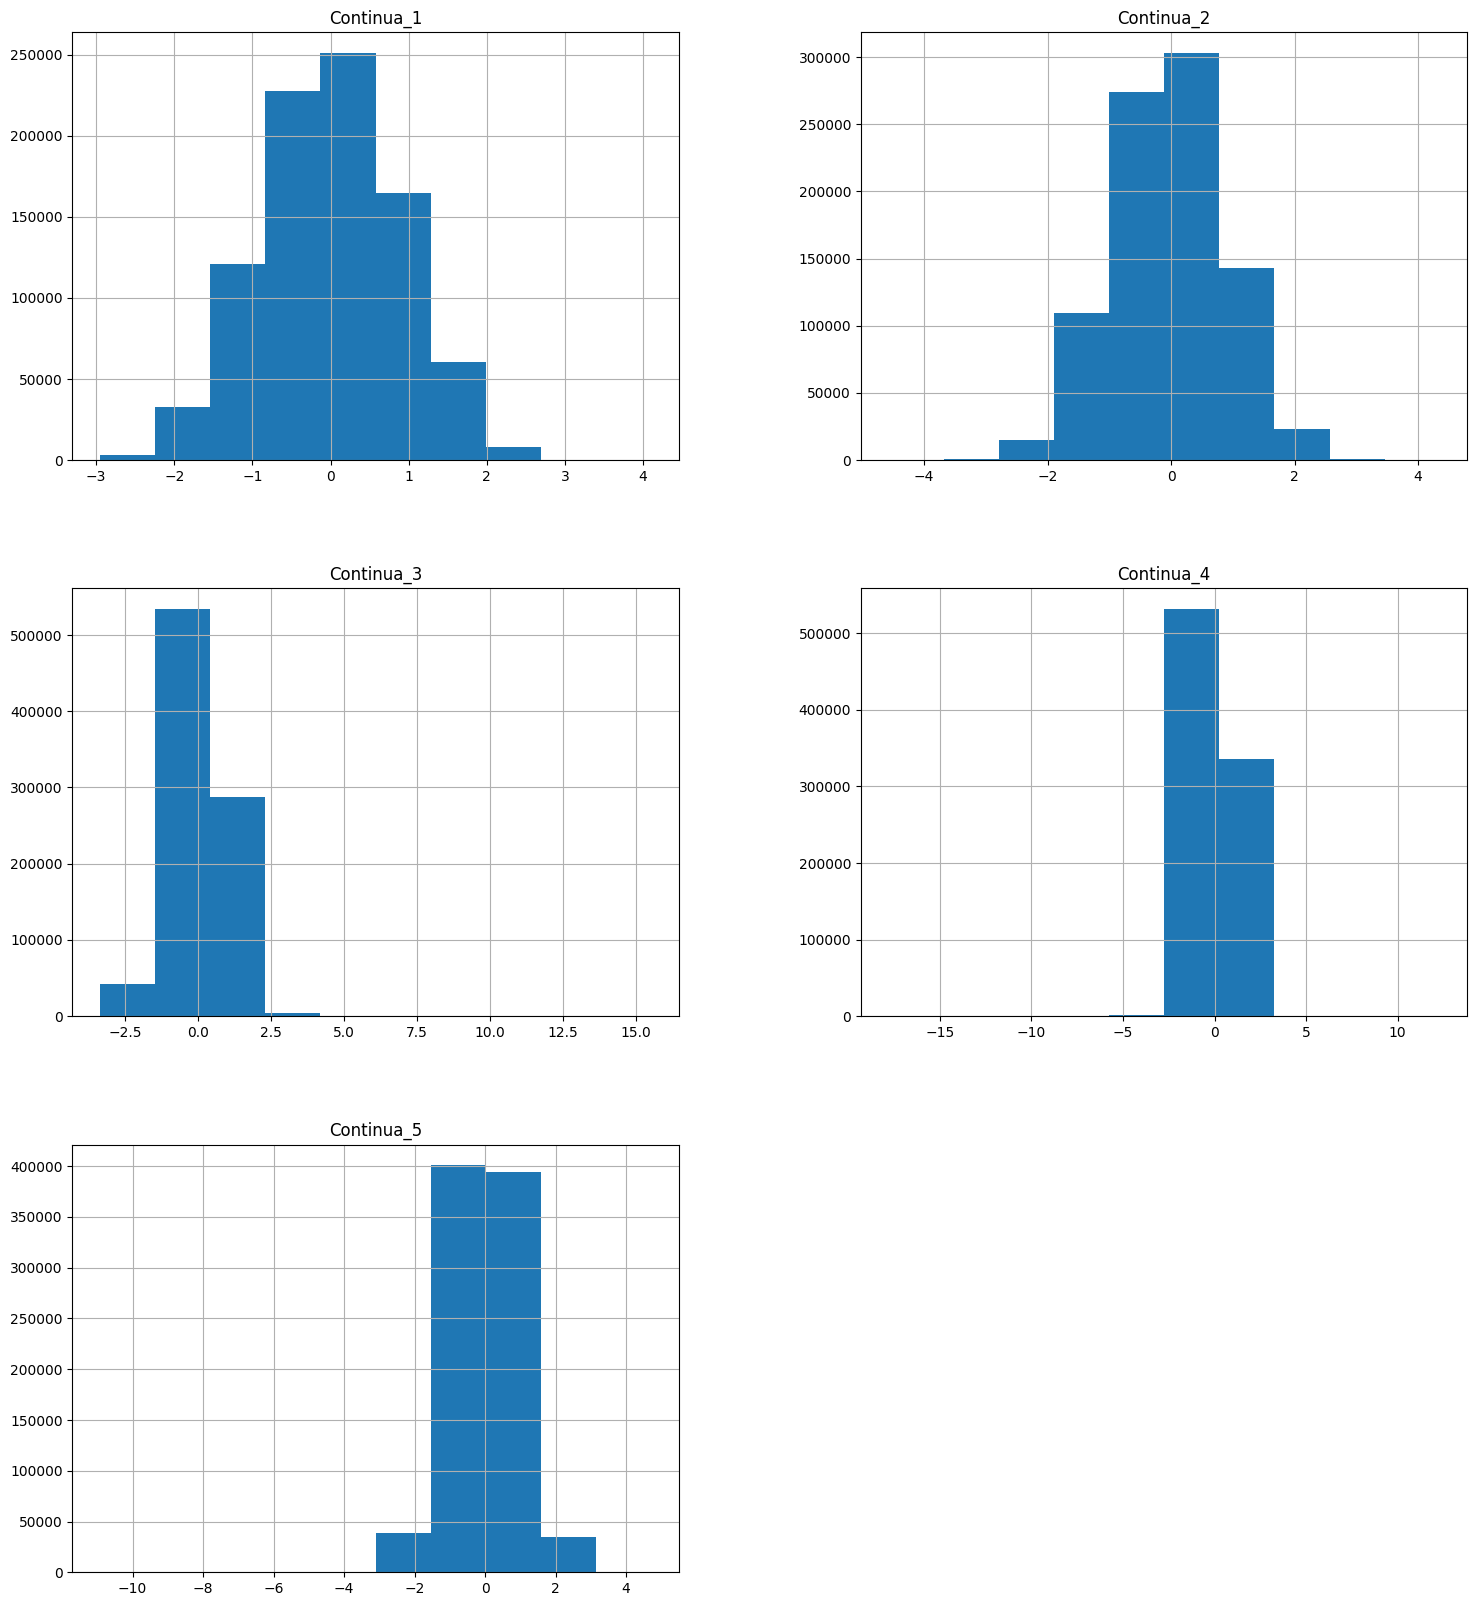

In [64]:
df2[iso_preds == 1].hist(figsize=(18,20));

#### DBSCAN

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
dbscan = DBSCAN(min_samples=5)

In [67]:
clusters = dbscan.fit_predict(df2)

In [68]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
pd.Series(clusters).unique(), len(pd.Series(clusters).unique())

(array([ 0, -1,  1,  2,  3, 43, 77, 36, 39, 18,  4, 41, 33, 80, 44,  5,  6,
         9, 49, 64, 32, 73, 21, 12, 20, 19, 54, 22, 76, 67, 61, 65, 37, 26,
         7, 27, 15,  8, 69, 60, 55, 10, 16, 11, 51, 79, 25, 50, 13, 28, 14,
        17, 62, 35, 48, 53, 23, 24, 81, 29, 30, 40, 38, 68, 31, 42, 75, 63,
        34, 66, 58, 78, 59, 74, 71, 45, 46, 47, 56, 72, 52, 82, 57, 70]),
 84)

In [70]:
pd.Series(clusters).value_counts(True).sort_values(ascending=False)

 0     0.983311
-1     0.016346
 5     0.000007
 77    0.000007
 29    0.000006
         ...   
 82    0.000003
 10    0.000002
 57    0.000002
 70    0.000002
 52    0.000001
Name: proportion, Length: 84, dtype: float64

In [88]:
len(df2), len(df2[clusters == 0])

(1000000, 983311)

In [89]:
len(df2) - len(df2[clusters == 0])

16689

In [90]:
(983654*100)/1000000

98.3654

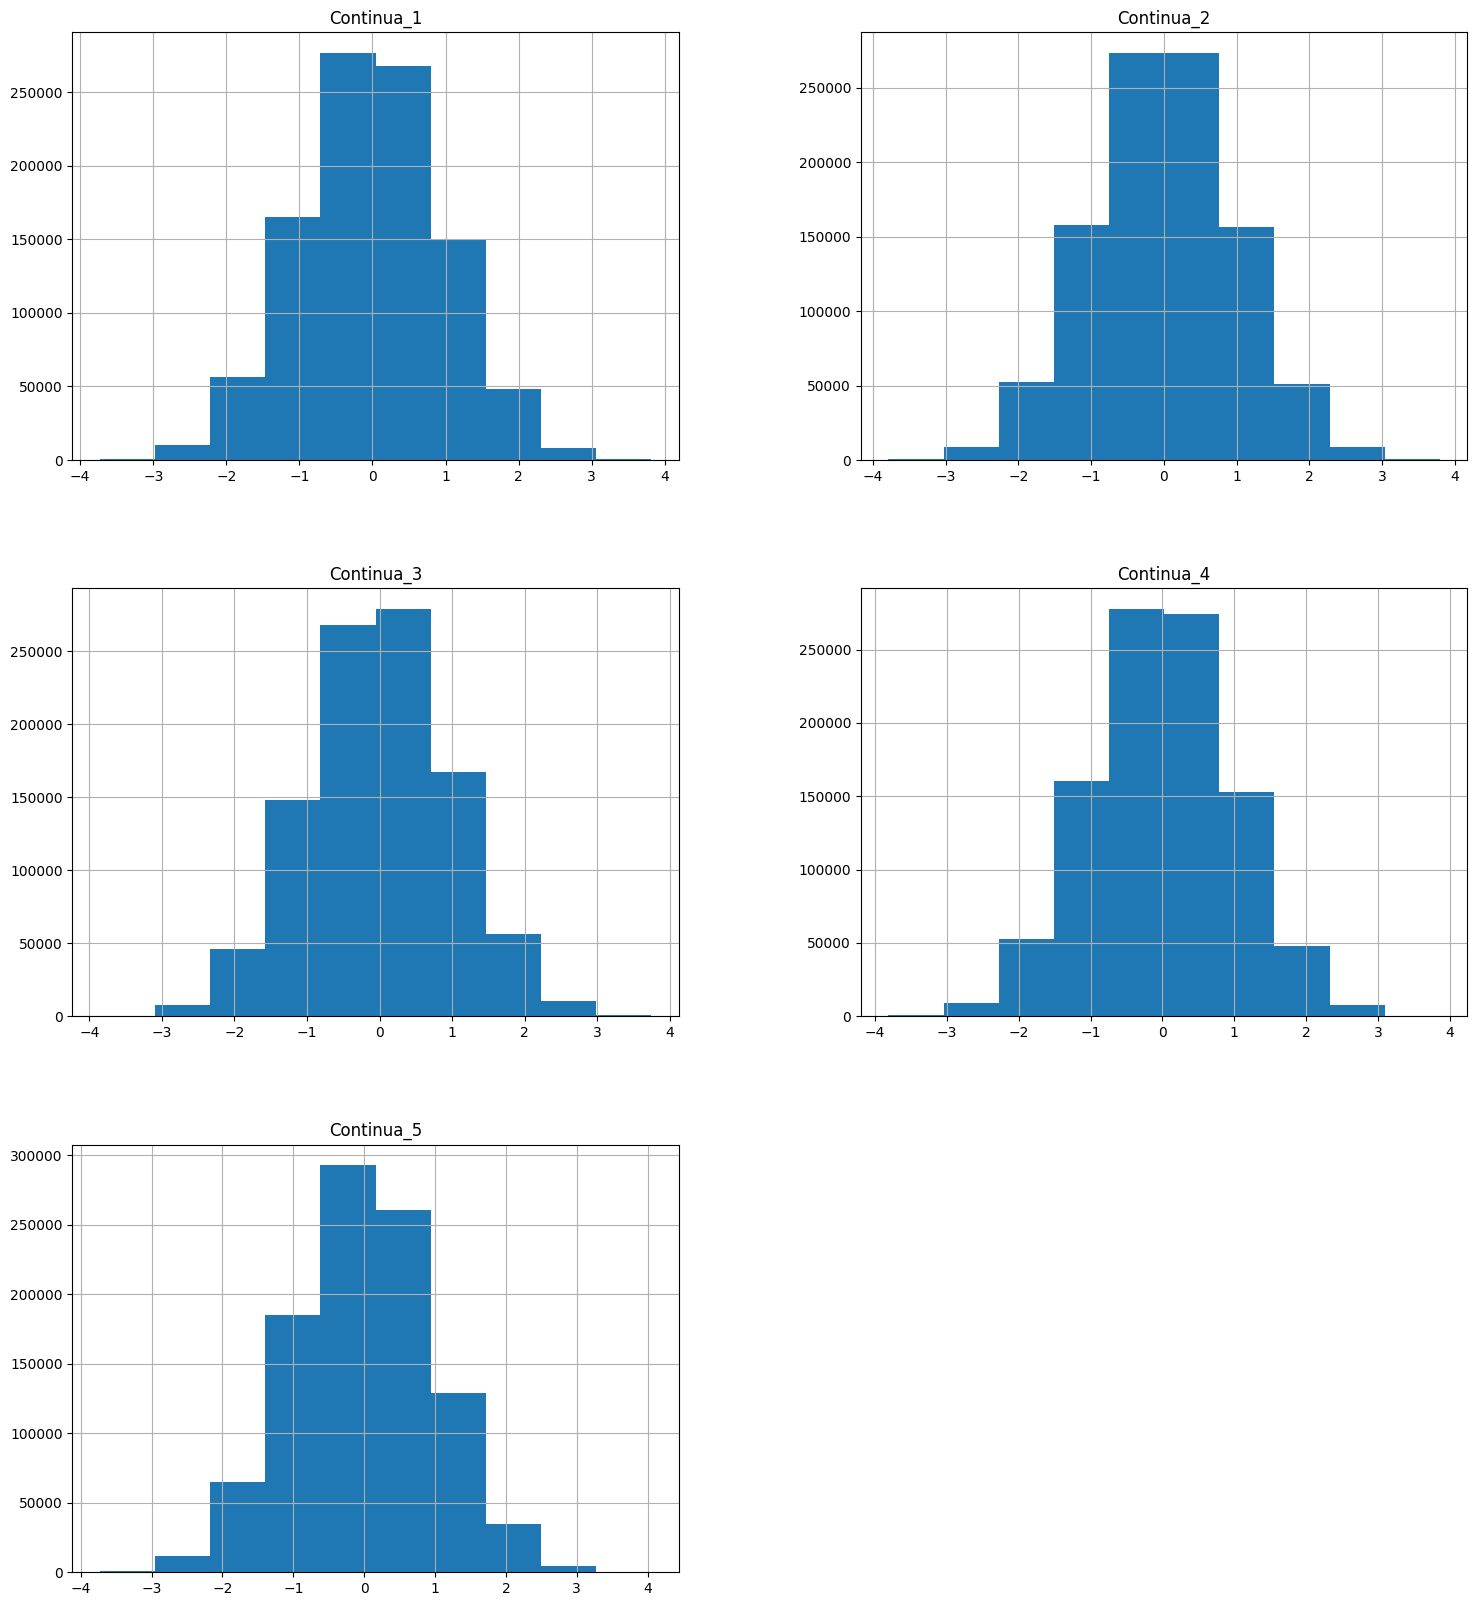

In [91]:
df2[clusters >= 0].hist(figsize=(18,20));